In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def g_h_filter(data, x0, y0, dx, dy, g, h, dt):
    """
    Performs g-h filter on 1 state variable with a fixed g and h, in 2D.

    'data' contains the data to be filtered.
    'x0' and 'y0' are the initial state estimates.
    'dx' and 'dy' are the initial state derivative estimates.
    'g' and 'h' are the g-h filter parameters.
    'dt' is the time step between measurements.
    """
    x_est = x0
    y_est = y0
    results = []
    for measurement in data:
        # Prediction step
        x_pred = x_est + dx * dt
        y_pred = y_est + dy * dt

        # Measurement update step
        residual_x = measurement[0] - x_pred
        residual_y = measurement[1] - y_pred

        x_est = x_pred + g * residual_x
        y_est = y_pred + g * residual_y

        dx += h * (residual_x / dt)
        dy += h * (residual_y / dt)

        results.append((x_est, y_est))
    return np.array(results)

In [4]:
# Simulation parameters

dt = 0.1
total_time = 21.0
x0, y0 = 0.0, 0.0
dx, dy = 1.0, -1.0
g, h = 0.2, 0.02



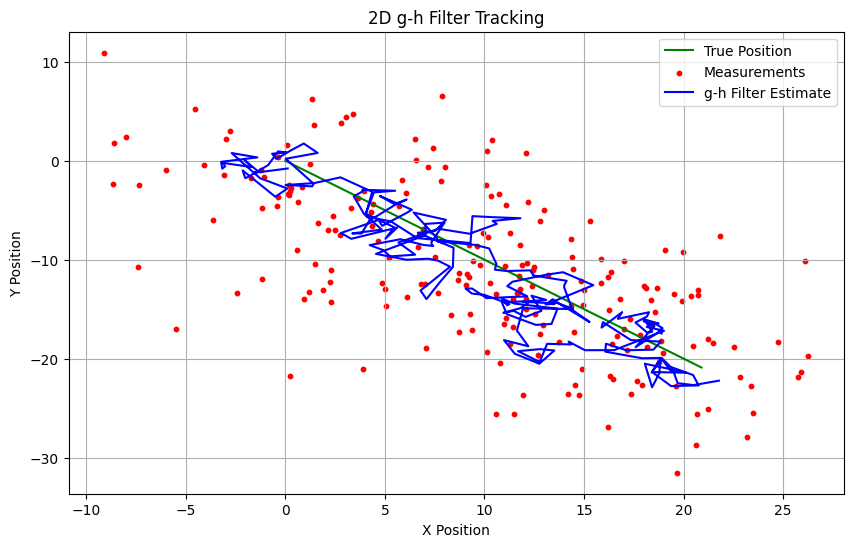

In [5]:
t = np.arange(0, total_time, dt)
true_positions = np.array([[x0 + dx * ti, y0 + dy * ti] for ti in t])
noise = np.random.normal(0, 5, true_positions.shape)
measurements = true_positions + noise
filter_results = g_h_filter(measurements, x0, y0, dx, dy, g, h, dt)

plt.figure(figsize=(10, 6))
plt.plot(true_positions[:, 0], true_positions[:, 1], label='True Position', color='g')
plt.scatter(measurements[:, 0], measurements[:, 1], label='Measurements', color='r', s=10)
plt.plot(filter_results[:, 0], filter_results[:, 1], label='g-h Filter Estimate', color='b')
plt.title('2D g-h Filter Tracking')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid()
plt.show()



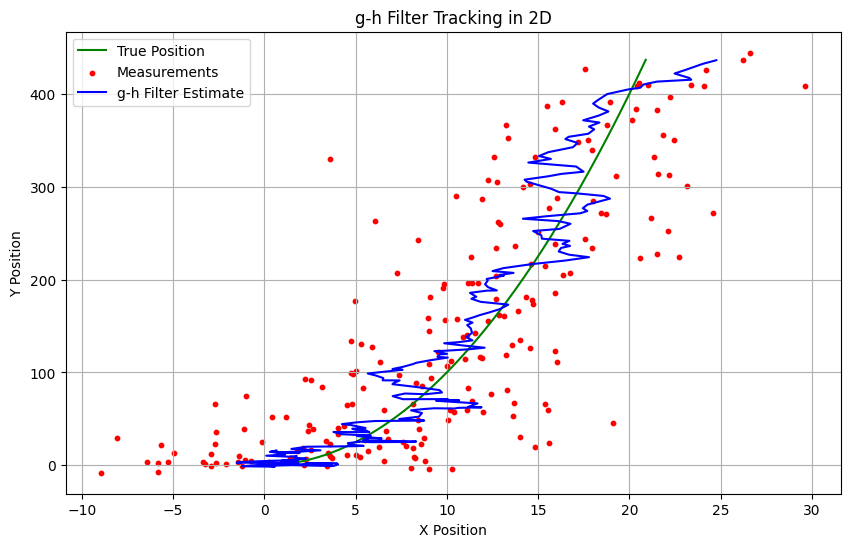

In [6]:


# Data

t = np.arange(0, total_time, dt)
x_true = x0 + t
y_true = x_true ** 2

noise = np.random.normal(0, 5, size=(len(t), 2))

x_meas = x_true + noise[:, 0]
y_meas = y_true + noise[:, 1]

# Run g-h filter
measurements = np.column_stack((x_meas, y_meas))
filter_results = g_h_filter(measurements, x0, y0, dx, dy, g, h, dt)



# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Position', color='g')
plt.scatter(x_meas, y_meas, label='Measurements', color='r', s=10)
plt.plot(filter_results[:, 0], filter_results[:, 1], label='g-h Filter Estimate', color='b')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('g-h Filter Tracking in 2D')
plt.legend()
plt.grid()
plt.show()

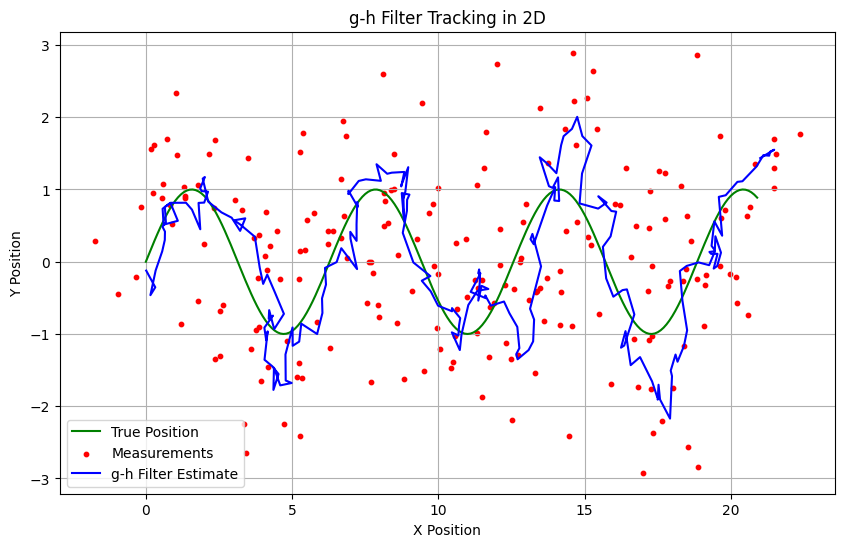

In [7]:
t = np.arange(0, total_time, dt)
x_true = x0 + t
y_true = np.sin(x_true)

noise = np.random.normal(0, 1, size=(len(t), 2))

x_meas = x_true + noise[:, 0]
y_meas = y_true + noise[:, 1]

# Run g-h filter
measurements = np.column_stack((x_meas, y_meas))
filter_results = g_h_filter(measurements, x0, y0, dx, dy, g, h, dt)



# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Position', color='g')
plt.scatter(x_meas, y_meas, label='Measurements', color='r', s=10)
plt.plot(filter_results[:, 0], filter_results[:, 1], label='g-h Filter Estimate', color='b')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('g-h Filter Tracking in 2D')
plt.legend()
plt.grid()
plt.show()